# RAFAEL NIÑO 200522388
# SANTIAGO BARCO 200913781
### GPU

## Applied Deep Learning Final Project

# Movie Genre Classification

Classify a movie genre based on its plot and its poster.

<img src="moviegenre.png"
     style="float: left; margin-right: 10px;" />

https://www.kaggle.com/c/miia4406-movie-genre-classification

To login use
https://www.kaggle.com/t/d4f98df572c64cb296cac8aa54df98b7

### Data

Input:
- movie plot
- movie image

Output:
Probability of the movie belong to each genre

See ExampleImgRF and ExampleTextRF to understand how to prepare the data.


### Evaluation

- 10% Create a solution using both images and text with a Machine Learning algorithm
- 40% Create a solution using both images and text with a Deep Learning algorithm (CNN, transfer learning, RNN)
- 30% Presentation (5 slides)
- 20% Performance in the Kaggle competition (Normalized acording to class performance in the private leaderboard)

** Groups of two! **

### Deadline

- Competition 07/23/2018 3:59 PM 
- Presentations 07/23/2018 6:00 PM 

### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

https://medium.com/@lisulimowicz/tensorflow-cpus-and-gpus-configuration-9c223436d4ef

https://www.tensorflow.org/guide/using_gpu

https://medium.com/@lisulimowicz/tensorflow-cpus-and-gpus-configuration-9c223436d4ef

https://learningtensorflow.com/lesson10/

https://stackoverflow.com/questions/44868914/using-gpu-vs-cpu-in-tensorflow-deep-mnist-example

https://medium.com/@lisulimowicz/tensorflow-cpus-and-gpus-configuration-9c223436d4ef


https://medium.com/@lisulimowicz/tensorflow-cpus-and-gpus-configuration-9c223436d4ef



### 0.1 Versión de python

In [1]:
import sys
print(sys.version)
# 3.6.5

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


In [2]:
import tensorflow as tf

In [3]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess

#Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

In [4]:
print(tf.__version__)

1.9.0


In [5]:
#import sys
#!{sys.executable} -m pip uninstall tensorflow-gpu

### 0.2 Uso de GPU

### Para evitar que se bloquee la GPU
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#Now when creating your session pass this config to it.
sess = tf.Session(config=config)

The second method is the per_process_gpu_memory_fraction option, which determines the fraction of the overall amount of memory that each visible GPU should be allocated. For example, you can tell TensorFlow to only allocate 40% of the total memory of each GPU by:

In [6]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
session = tf.Session(config=config)

In [7]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [8]:
import tensorflow as tf
tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6378999212706407437
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1741082624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15355355965038652028
physical_device_desc: "device: 0, name: GeForce GTX 860M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [10]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print("USO DE GPU",get_available_gpus())

USO DE GPU ['/device:GPU:0']


In [11]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [12]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [13]:
import tensorflow as tf
tf.test.is_gpu_available()

True

### 0.3 Uso de Tensorflow

In [14]:
import tensorflow as tf
hello=tf.constant('Hello,TensorFlow!')
sess=tf.Session()
print(sess.run(hello))

b'Hello,TensorFlow!'


### 0.4 Declaración de librerias

In [15]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

# Read Data

In [16]:
path = '../finalproject/'

In [19]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [20]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [21]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


# Read Images

In [22]:
imageG = io.imread(os.path.join(path, 'images_resize_gray', str(dataTraining.index[0]) + '_resize_gray.jpeg'))

In [23]:
imageG.shape

(256, 160)

In [24]:
imageG

array([[ 3,  3,  3, ..., 57, 55, 51],
       [ 3,  3,  3, ..., 99, 98, 95],
       [ 3,  3,  3, ..., 97, 96, 94],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

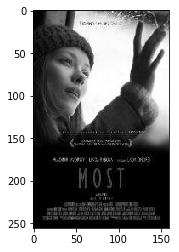

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(imageG, cmap='gray')

Read all images

In [26]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|████████████████████████████████████| 7895/7895 [00:04<00:00, 1618.63it/s]


In [375]:
images_trainingG = np.stack(images_training)

images_trainingG.shape, dataTraining.shape[0]

((7895, 40960), 7895)

In [376]:
images_testingG = []
for i in tqdm(dataTesting.index):
    images_testingG.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

images_testingG = np.stack(images_testingG)

images_testingG.shape, dataTesting.shape[0]

100%|████████████████████████████████████| 3383/3383 [00:02<00:00, 1623.64it/s]


((3383, 40960), 3383)

In [377]:
images_trainingG

array([[  3,   3,   3, ...,   0,   0,   0],
       [211, 213, 214, ..., 190, 190, 191],
       [204, 206, 209, ..., 229, 229, 230],
       ...,
       [125, 125, 125, ..., 251, 251, 251],
       [220, 232, 245, ..., 240, 240, 239],
       [ 11,  12,  13, ...,  29,  28,  28]], dtype=uint8)

In [378]:
images_trainingG.shape

(7895, 40960)

In [379]:
images_trainingG[1]

array([211, 213, 214, ..., 190, 190, 191], dtype=uint8)

In [380]:
images_trainingG[1].shape

(40960,)

## Apply PCA con los datos de TRAIN iniciales

In [381]:
pca = PCA(n_components=28)
images_trainingG_pca = pca.fit_transform(images_trainingG)

In [382]:
images_testingG_pca = pca.transform(images_testingG)

In [383]:
images_testingG_pca.shape

(3383, 28)

# Create "Y" con los datos de TRAIN

In [384]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

In [385]:
dataTraining['genres']

3107                                        [Short, Drama]
900                                [Comedy, Crime, Horror]
6724                          [Drama, Film-Noir, Thriller]
4704                                               [Drama]
2582                             [Action, Crime, Thriller]
9784                                      [Drama, Western]
8804                                    [Horror, Thriller]
3501                                       [Drama, Family]
7145                     [Comedy, Drama, Fantasy, Romance]
4067                                       [Comedy, Sport]
4584                                              [Comedy]
2471                                              [Comedy]
6123                                     [Drama, Thriller]
5091                            [Comedy, Fantasy, Romance]
1472                                      [Drama, Western]
11066                                    [Comedy, Romance]
914                               [Crime, Drama, Thrille

In [386]:
le = MultiLabelBinarizer()

## Convierte los géneros de las peliculas en varias columnas.

In [387]:
dataTraining['genres'][3107]

['Short', 'Drama']

In [388]:
y_genres = le.fit_transform(dataTraining['genres'])

In [389]:
y_genres.shape

(7895, 24)

In [390]:
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [391]:
y_genres[:1]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0]])

## Se forma un nuevo TEST y TRAIN con los datos de TRAINING iniciales

In [392]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_trainingG_pca, y_genres, test_size=0.33, random_state=42)

# MODELO DE MACHINE LEARNING Imágenes en gris

# Train multi-class multi-label model

### Modelo de RANDOM FOREST
***

In [393]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [394]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

### Predicción del modelo

In [395]:
y_pred_genres = clf.predict_proba(X_test)

In [396]:
y_pred_genres.shape
# se observa la cantidad de varaibles resultantes de 24

(2606, 24)

In [397]:
# Crea la matriz de probabilidades por cada categoría
y_pred_genres[:1]

array([[0.19290905, 0.15056226, 0.01603586, 0.04087943, 0.27219347,
        0.20043519, 0.07365681, 0.48458976, 0.06199855, 0.11244657,
        0.01411687, 0.06746032, 0.15294659, 0.03554355, 0.01529563,
        0.13270984, 0.        , 0.1904269 , 0.08964369, 0.00266973,
        0.01241291, 0.34014724, 0.02832482, 0.0121637 ]])

In [398]:
y_pred_genresRF = y_pred_genres

In [399]:
y_pred_genresRF[y_pred_genresRF>=0.5]=1
y_pred_genresRF[y_pred_genresRF<0.5]=0

In [400]:
y_pred_genresRF[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [401]:
y_pred_genresRF.shape

(2606, 24)

In [402]:
y_test_genres[:1]

array([[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0]])

In [403]:
#roc_auc_score(y_test_genres, y_pred_genresRF, average='macro')

In [404]:
#from sklearn import metrics
#print(metrics.roc_auc_score(y_test_genres, y_pred_genresRF))

In [405]:
print('The accuracy of the model is ',(y_pred_genresRF==y_test_genres).mean())
RF = (y_pred_genresRF==y_test_genres).mean()

The accuracy of the model is  0.8893419033000768


In [406]:
RF

0.8893419033000768

# Apply models to test - Se usa el nuevo modelo a los datos de TEST

In [407]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# INDICO QUE REQUIERO LAS PROBABILIDADES
y_pred_test_genresG = clf.predict_proba(images_testingG_pca)

In [408]:
y_pred_test_genresG.shape

(3383, 24)

### Se imprime el resultado en un CSV

In [409]:
pd.DataFrame(y_pred_test_genresG, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_BLANCO_NEGRO.csv', index_label='ID')

# 2.0 IMÁGENES A COLOR
## 2.1 Leyendo los datos

In [410]:
path = '../finalproject/'

In [411]:
carpetaIMG = "imagesR"

In [412]:
carpetaCSV = 'data'

In [413]:
### Se define la carpeta donde está la información.
dataTraining = pd.read_csv(os.path.join(path, carpetaCSV, 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, carpetaCSV, 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [414]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [415]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


## 2.2 Se lee una imagen a Color

In [416]:
image = io.imread(os.path.join(path,"images", str(dataTraining.index[0]) + '.jpeg'))

In [417]:
image.shape
## Son 3 matrices

(475, 304, 3)

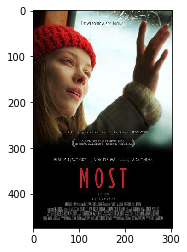

In [418]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

## 2.3 RESIZE DE LA IMAGEN

In [419]:
from skimage.transform import resize
image = io.imread(os.path.join(path,"images", str(dataTraining.index[0]) + '.jpeg'))
image = resize(image, (32, 32), mode='reflect')

In [420]:
image.shape

(32, 32, 3)

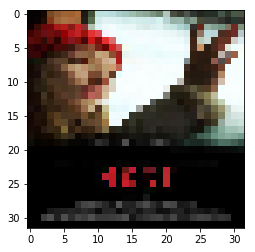

In [421]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

io.imsave('imagesL/iamge.jpeg',image)
#io.imsave("lena_generada.png",lena_gris)

## 2.3 Se lee TRAINING

In [422]:
dataTraining.index

Int64Index([ 3107,   900,  6724,  4704,  2582,  9784,  8804,  3501,  7145,
             4067,
            ...
             8268,  3313,  4781,  6632, 10794,  8417,  1592,  1723,  7605,
              215],
           dtype='int64', length=7895)

In [423]:
# Se define la carpeta donde está la info,
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, carpetaIMG,str(i) + '.jpeg')))
    

100%|████████████████████████████████████| 7895/7895 [00:02<00:00, 2728.46it/s]


### Imágenes de diferentes tamaños

In [424]:
images_training[1].shape

(32, 32, 3)

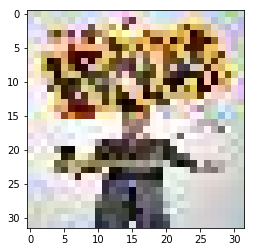

In [425]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(images_training[1], cmap='gray')

In [426]:
images_training[2].shape

(32, 32, 3)

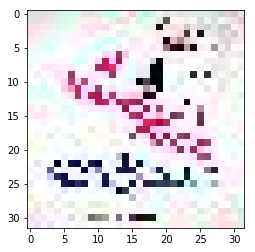

In [427]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(images_training[2], cmap='gray')

###  2.4 RESIZE DE TODAS LAS IMÁGENES TRAINING

In [428]:
rangemax = len(dataTraining.index)
rangemax

7895

carpetaNEW = "imagesL"

for i in range(0,1000):
    images_training[i] = resize(images_training[i], (32,32,3), mode='reflect')
    io.imsave(os.path.join(carpetaNEW, str(i) + '.jpeg'),images_training[i])


In [429]:
for i in range(0,rangemax):
    images_training[i] = resize(images_training[i], (32,32,3), mode='reflect')

In [430]:
images_training[1].shape

(32, 32, 3)

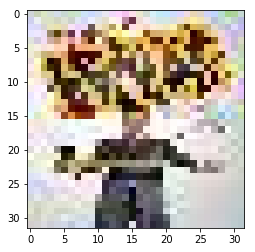

In [431]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(images_training[1], cmap='gray')

In [432]:
images_training[21].shape

(32, 32, 3)

In [433]:
images_training[5].shape

(32, 32, 3)

In [434]:
images_training[21][0,1]

array([0.27058824, 0.29411765, 0.25490196])

In [435]:
images_training[21][0,0,1]

0.8823529411764685

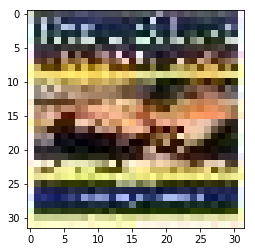

In [436]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(images_training[21], cmap='gray')

In [437]:
images_training[0].shape

(32, 32, 3)

In [438]:
images_training[21].shape

(32, 32, 3)

In [439]:
len(images_training)

7895

In [440]:
images_training[len(images_training)-1].shape

(32, 32, 3)

In [441]:
type(images_training)

list

In [442]:
#for i in range(0,rangemax):
 #   print('shape',images_training[i].shape, i)

## 2.5 NP STACK de Training

In [443]:
images_training = np.stack(images_training)
images_training.shape

(7895, 32, 32, 3)

In [444]:
images_training_flatt = np.stack(images_training)
images_training_flatt.shape

(7895, 32, 32, 3)

### Se convierte en un VECTOR la MATRIZ usando FLATTEN¶

In [445]:
images_training_flatt =images_training_flatt.flatten()
images_training_flatt

array([0.02352941, 0.        , 0.        , ..., 0.55686275, 0.01176471,
       0.03921569])

In [446]:
images_training.shape

(7895, 32, 32, 3)

In [447]:
dataTraining.shape[0]

7895

In [448]:
images_training.shape, dataTraining.shape[0]

((7895, 32, 32, 3), 7895)

In [449]:
images_training_flatt.shape

(24253440,)

In [450]:
images_training.shape

(7895, 32, 32, 3)

## 2.6 Se lee TESTING

In [451]:
dataTesting.index

Int64Index([    1,     4,     5,     6,     7,     9,    11,    13,    16,
               21,
            ...
            11257, 11258, 11259, 11260, 11262, 11263, 11265, 11269, 11270,
            11275],
           dtype='int64', length=3383)

In [452]:
# Se define la carpeta donde está la info,
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, carpetaIMG, str(i) + '.jpeg')))

100%|████████████████████████████████████| 3383/3383 [00:01<00:00, 2726.33it/s]


###  2.7 RESIZE DE TODAS LAS IMÁGENES TESTING

In [453]:
rangemax = len(dataTesting.index)
rangemax

3383

In [454]:
for i in range(0,rangemax):
    images_testing[i] = resize(images_testing[i], (32,32,3), mode='reflect')

## 2.8 NP STACK de Testing

In [455]:
images_testing = np.stack(images_testing)
images_testing.shape

(3383, 32, 32, 3)

In [456]:
images_testing.shape

(3383, 32, 32, 3)

In [457]:
dataTesting.shape[0]

3383

In [458]:
images_testing.shape, dataTesting.shape[0]

((3383, 32, 32, 3), 3383)

# 3. MODELO DE DEEP LEARNING KERAS Imágenes en COLOR

***

## Se forma un nuevo TEST y TRAIN con los datos de TRAINING COLOR iniciales

## 3.1 Create "Y" con los datos de TRAIN a COLOR

In [459]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

In [460]:
dataTraining['genres']

3107                                        [Short, Drama]
900                                [Comedy, Crime, Horror]
6724                          [Drama, Film-Noir, Thriller]
4704                                               [Drama]
2582                             [Action, Crime, Thriller]
9784                                      [Drama, Western]
8804                                    [Horror, Thriller]
3501                                       [Drama, Family]
7145                     [Comedy, Drama, Fantasy, Romance]
4067                                       [Comedy, Sport]
4584                                              [Comedy]
2471                                              [Comedy]
6123                                     [Drama, Thriller]
5091                            [Comedy, Fantasy, Romance]
1472                                      [Drama, Western]
11066                                    [Comedy, Romance]
914                               [Crime, Drama, Thrille

## 3.2 Convierte los géneros de las peliculas en varias columnas

In [461]:
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
y_genres.shape

(7895, 24)

In [462]:
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

## 3.2 Create "variables X" con los datos de TRAIN a COLOR


## Se forma un nuevo TEST y TRAIN con los datos de TRAINING iniciales COLOR

In [463]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training, y_genres, test_size=0.33, random_state=42)

In [464]:
X_train.shape

(5289, 32, 32, 3)

In [465]:
y_train_genres.shape

(5289, 24)

In [466]:
y_test_genres.shape

(2606, 24)

In [467]:
y_train_genres

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

## 3.3 Modelo con Keras

In [468]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras

In [469]:
from keras.layers import Dropout

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(24))
model.add(Activation('softmax'))
model.add(Dropout(0.2))
model.add(Dense(24))
model.add(Activation('softmax'))
#model.summary(70)

In [470]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [471]:
y_test_genres[:1]

array([[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0]])

In [472]:
y_train_genres[:1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0]])

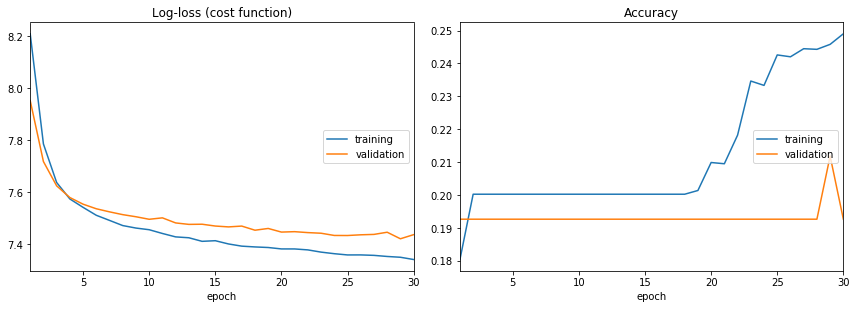

In [473]:
#model.fit(X_train,y_train_genres,epochs=5,verbose=2)
model.fit(X_train, y_train_genres, validation_data=[X_test, y_test_genres], 
          batch_size=32, epochs=30, verbose=1,
          callbacks=[PlotLossesKeras()])

In [474]:
# make predictions for testing set
y_pred = model.predict_classes(X_test)
y_pred

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [475]:
y_pred.shape

(2606,)

In [476]:
# make predictions for testing set
y_pred_genres = model.predict_proba(X_test)
y_pred_genres.shape

(2606, 24)

In [477]:
y_pred_genres[:1]

array([[0.06304983, 0.04586586, 0.01345965, 0.01803942, 0.10935198,
        0.06950805, 0.02141116, 0.17913151, 0.02943534, 0.03263892,
        0.01061469, 0.0157488 , 0.05018584, 0.01691009, 0.01441252,
        0.03820872, 0.00611456, 0.07124044, 0.03409202, 0.007878  ,
        0.01477601, 0.10572152, 0.01910925, 0.01309592]], dtype=float32)

In [478]:
y_test_genres.shape

(2606, 24)

In [479]:
y_test_genres[:1]

array([[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0]])

In [480]:
Ynew_test=y_test_genres.argmax(axis=1)
Ynew_test.shape

(2606,)

In [481]:
Ynew_test[:1]

array([5], dtype=int64)

In [482]:
y_pred[:1]

array([7], dtype=int64)

In [483]:
y_pred_genresKERAS = y_pred_genres

In [484]:
y_pred_genresKERAS[y_pred_genres2>=0.5]=1
y_pred_genresKERAS[y_pred_genres2<0.5]=0

In [485]:
y_pred_genresKERAS[:1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [490]:
print('The accuracy of the model KERAS is ',(y_pred_genresKERAS==y_test_genres).mean())
KERAS = (y_pred_genresKERAS==y_test_genres).mean()

The accuracy of the model KERAS is  0.8866557943207981


In [491]:
KERAS

0.8866557943207981

In [492]:
## PERFORMANCE DE MODELO
#score = model.evaluate(X_test, y_test_genres)

In [493]:
#print('Test score:', score[0])
#print('Test accuracy:', score[1])

## 3.4 SE APLICA EL NUEVO MODELO A LOS DATOS DE TEST INICIALES

In [494]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']


In [495]:
# INDICO QUE REQUIERO LAS PROBABILIDADES
y_pred_test_genres1 = model.predict_proba(images_testing)

In [496]:
y_pred_test_genres1.shape

(3383, 24)

## 3.5 RESULTADO DE LA PREDICCIÓN KERAS

In [497]:
pd.DataFrame(y_pred_test_genres1, columns=cols).head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
0,0.063397,0.044413,0.011809,0.017080,0.130593,0.066345,0.020372,0.192300,0.029801,0.031925,...,0.013165,0.034465,0.004639,0.081073,0.031294,0.006393,0.013392,0.096642,0.018074,0.011564
1,0.062791,0.045580,0.015362,0.019047,0.095256,0.069815,0.022902,0.165759,0.030081,0.032873,...,0.016235,0.040876,0.007612,0.063713,0.035731,0.009559,0.016419,0.112064,0.021085,0.014289
2,0.062421,0.044242,0.014387,0.018016,0.100608,0.068822,0.022102,0.171588,0.029486,0.032213,...,0.015323,0.040287,0.006983,0.063666,0.035804,0.008687,0.016072,0.113494,0.020891,0.013423
3,0.059647,0.049315,0.012832,0.017120,0.115738,0.066545,0.020602,0.167681,0.031679,0.033204,...,0.014446,0.037246,0.006137,0.078494,0.036773,0.007652,0.013973,0.106061,0.018522,0.011951
4,0.057004,0.046703,0.010504,0.015885,0.165253,0.064536,0.018746,0.193731,0.030351,0.030713,...,0.011803,0.031647,0.003395,0.100163,0.028507,0.005563,0.010663,0.079648,0.015697,0.010151


## 3.6 Se imprime en un CSV el resultado

In [498]:
pd.DataFrame(y_pred_test_genres1, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_KERAS.csv', index_label='ID')

##  4. MODELO DE DEEP LEARNING Imágenes en COLOR
## TRANSFER LEARNING CON VGG

In [499]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [500]:
from keras.applications import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os

In [501]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

In [502]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [503]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras

In [504]:
from keras.applications import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os

In [505]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
session = tf.Session(config=config)

In [506]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import numpy as np
model_vgg16 = VGG16(include_top=False, weights='imagenet')
print('Model VGG loaded.')


Model VGG loaded.


In [507]:
VGG_X_train = model_vgg16.predict(X_train)

In [508]:
VGG_X_test = model_vgg16.predict(X_test)

In [509]:
VGG_X_train.shape

(5289, 1, 1, 512)

In [510]:
model2 = Sequential()
model2.add(Flatten(input_shape=(1,1,512)))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(24, activation='softmax'))

In [512]:
model2.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])

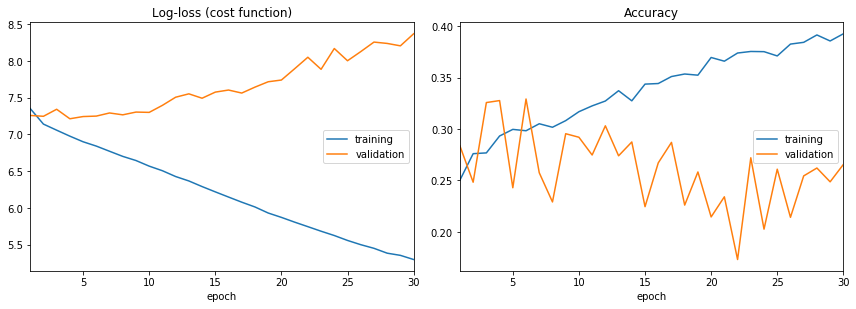

In [513]:
#model.fit(X_train,y_train_genres,epochs=5,verbose=2)
model2.fit(VGG_X_train, y_train_genres, validation_data=[VGG_X_test, y_test_genres], 
          batch_size=32, epochs=30, verbose=1,
          callbacks=[PlotLossesKeras()])

In [514]:
#score2 = model2.evaluate(VGG_X_test, y_test_genres)


In [515]:
#print('Test score2:', score2[0])
#print('Test accuracy2:', score2[1])

In [516]:
# make predictions for testing set
y_pred22 = model2.predict_classes(VGG_X_test)
y_pred22

array([17, 17,  7, ...,  7,  4,  4], dtype=int64)

In [517]:
# make predictions for testing set
y_pred_genres22 = model2.predict_proba(VGG_X_test)
y_pred_genres22.shape

(2606, 24)

In [518]:
# Resultado en Probabilidades
y_pred_genres22[:1]

array([[2.16544257e-04, 4.28198255e-04, 8.61383910e-07, 1.34230475e-03,
        3.78010906e-02, 7.58367591e-04, 1.06977008e-04, 3.12237531e-01,
        1.24291331e-03, 2.11344426e-03, 1.04118918e-07, 1.26835983e-03,
        4.07862989e-03, 9.10537550e-04, 9.35221408e-07, 2.95635196e-03,
        1.86795336e-21, 6.30782902e-01, 6.85621460e-04, 2.33035007e-06,
        1.22264755e-05, 2.32095853e-03, 7.22172263e-04, 1.05735871e-05]],
      dtype=float32)

In [519]:
y_pred_genresVGG = y_pred_genres22

In [520]:
y_pred_genresVGG[y_pred_genres22>=0.5]=1
y_pred_genresVGG[y_pred_genres22<0.5]=0

In [521]:
y_pred_genresVGG[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [522]:
y_test_genres[:1]

array([[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0]])

In [523]:
Ynew22_test=y_test_genres.argmax(axis=1)
Ynew22_test.shape

(2606,)

In [524]:
print('The accuracy of the model2 VGG is ',(y_pred_genresVGG==y_test_genres).mean())
VGG = (y_pred_genresVGG==y_test_genres).mean()

The accuracy of the model2 VGG is  0.8868956254796623


In [525]:
VGG

0.8868956254796623

## 4.4 SE APLICA EL NUEVO MODELO A LOS DATOS DE TEST INICIALES

In [208]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']


In [209]:
VGG_images_testing = model_vgg16.predict(images_testing)

In [210]:
# INDICO QUE REQUIERO LAS PROBABILIDADES
y_pred_test_genres2 = model2.predict_proba(VGG_images_testing)

In [211]:
y_pred_test_genres2.shape

(3383, 24)

## 4.5 RESULTADO DE LA PREDICCIÓN TRANSFER LEARNING VGG

In [212]:
pd.DataFrame(y_pred_test_genres2, columns=cols).head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
0,0.050205,0.049439,0.017937,0.063948,0.066421,0.044743,0.045279,0.106221,0.022229,0.019554,...,0.025042,0.015421,9.044732e-04,0.062975,0.020745,1.011538e-02,0.045064,0.058706,0.062979,0.065415
1,0.062087,0.094618,0.002321,0.006067,0.041408,0.067823,0.025705,0.201788,0.019273,0.072773,...,0.001110,0.056413,6.978877e-06,0.027564,0.018350,2.300846e-03,0.011206,0.170485,0.003753,0.001113
2,0.076865,0.090826,0.000393,0.019009,0.020920,0.055624,0.005967,0.284841,0.005179,0.028783,...,0.000316,0.031367,3.938142e-09,0.101572,0.015098,1.894637e-04,0.012152,0.087930,0.033623,0.036519
3,0.032178,0.007875,0.000014,0.002562,0.087785,0.214890,0.000312,0.493403,0.001453,0.000805,...,0.000119,0.012450,1.605690e-12,0.040342,0.003991,2.086072e-06,0.000279,0.092516,0.001494,0.000075
4,0.012380,0.015586,0.000118,0.000005,0.415001,0.005997,0.000261,0.089650,0.056607,0.123739,...,0.011824,0.006751,4.580753e-14,0.030592,0.022266,2.683326e-08,0.000960,0.082360,0.002963,0.001010


## 4.6 Se imprime en un CSV el resultado TRANSFER LEARNING VGG

In [213]:
pd.DataFrame(y_pred_test_genres2, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_VGG.csv', index_label='ID')

##  5. MODELO DE DEEP LEARNING Imágenes en COLOR
## TRANSFER LEARNING CON CNN

In [246]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv3D

In [247]:
model3 = Sequential()
model3.add(Conv2D(16,(3,3), padding="same",input_shape=(32,32,3)))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#model3.add(Dropout(0.5))

model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Flatten(input_shape=(32,32,3)))
model3.add(Dense(24, activation='softmax'))



In [248]:
from keras.optimizers import SGD
model3.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])


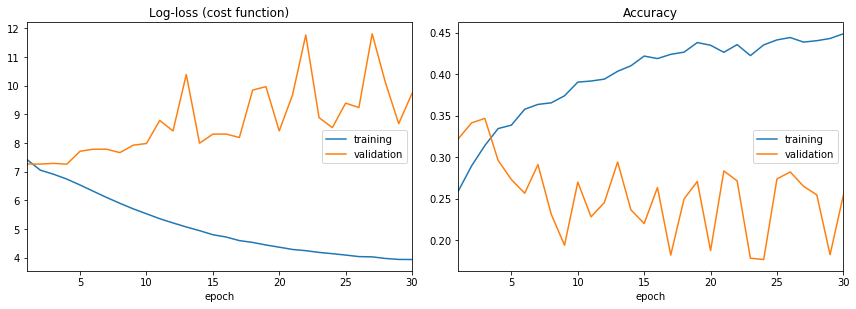

In [249]:
#model.fit(X_train,y_train_genres,epochs=5,verbose=2)
model3.fit(X_train, y_train_genres, validation_data=[X_test, y_test_genres], 
          batch_size=32, epochs=30, verbose=1,
          callbacks=[PlotLossesKeras()])

In [250]:
score3 = model3.evaluate(X_test, y_test_genres)

2606/2606 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 962us/step


In [251]:
print('Test score2:', score3[0])
print('Test accuracy2:', score3[1])

Test score2: 9.731568893833701
Test accuracy2: 0.2540291634803539


In [252]:
# make predictions for testing set
y_pred3 = model3.predict_classes(X_test)
y_pred3

array([7, 4, 7, ..., 7, 4, 7], dtype=int64)

In [253]:
# make predictions for testing set
y_pred_genres3 = model3.predict_proba(X_test)
y_pred_genres3.shape

(2606, 24)

In [269]:
y_test_genres[:1]

array([[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0]])

In [270]:
y_pred_genres3[:1]

array([[5.41280657e-02, 1.16810352e-02, 1.03201921e-04, 1.59666839e-03,
        5.57855926e-02, 6.60401285e-02, 9.28994082e-03, 2.75322616e-01,
        3.19826766e-04, 8.48168973e-03, 1.65805002e-04, 9.10087430e-04,
        4.70161587e-02, 7.25942478e-03, 7.67461665e-04, 5.25223948e-02,
        1.03575701e-06, 2.60224104e-01, 3.07414029e-02, 8.76258127e-04,
        1.32056256e-03, 1.13541774e-01, 1.24517642e-03, 6.59476733e-04]],
      dtype=float32)

In [271]:
y_pred_genresCNN = y_pred_genres3

In [272]:
y_pred_genresCNN[y_pred_genres3>=0.5]=1
y_pred_genresCNN[y_pred_genres3<0.5]=0

In [273]:
y_pred_genresCNN[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [275]:
Ynew3_test=y_test_genres.argmax(axis=1)
Ynew3_test.shape

(2606,)

In [277]:
print('The accuracy of the model3 CNN is ',(y_pred_genresCNN==y_test_genres).mean())
CNN = (y_pred_genresCNN==y_test_genres).mean()

The accuracy of the model3 CNN is  0.8883665899206958


In [278]:
CNN

0.8883665899206958

## 5.4 SE APLICA EL NUEVO MODELO A LOS DATOS DE TEST INICIALES

In [279]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

In [280]:
# INDICO QUE REQUIERO LAS PROBABILIDADES
y_pred_test_genres3 = model3.predict_proba(images_testing)

In [281]:
y_pred_test_genres3.shape

(3383, 24)

## 5.5 RESULTADO DE LA PREDICCIÓN TRANSFER LEARNING CNN

In [283]:
pd.DataFrame(y_pred_test_genres3, columns=cols).head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
0,0.032266,0.021593,0.014595,0.007304,0.282523,0.006699,0.076352,0.209499,0.069702,0.010962,...,0.007428,0.006426,2.748978e-06,0.139502,0.018133,1.172697e-03,0.036260,0.017531,0.017253,1.261095e-02
1,0.058992,0.026934,0.000244,0.006245,0.052245,0.041448,0.016521,0.190775,0.001360,0.018722,...,0.000906,0.122037,3.105095e-07,0.079571,0.043114,1.928316e-04,0.000797,0.154716,0.005632,3.048970e-04
2,0.027633,0.002316,0.000042,0.005732,0.018049,0.144330,0.004718,0.417639,0.002134,0.022077,...,0.000036,0.024440,2.203190e-08,0.047093,0.008339,4.716205e-06,0.000365,0.183787,0.000581,1.228215e-03
3,0.002975,0.000340,0.000002,0.000003,0.359208,0.049351,0.000016,0.428417,0.000268,0.001855,...,0.000714,0.002373,8.800827e-11,0.130554,0.000657,1.307000e-09,0.000035,0.022816,0.000034,1.606229e-07
4,0.010787,0.006401,0.000042,0.001521,0.448830,0.006876,0.000185,0.375315,0.008849,0.000914,...,0.000305,0.002113,3.726685e-09,0.115374,0.000145,4.102235e-08,0.000272,0.019434,0.000640,3.590181e-04


## 5.6 Se imprime en un CSV el resultado TRANSFER LEARNING CNN

In [284]:
pd.DataFrame(y_pred_test_genres3, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_CNN.csv', index_label='ID')

## CONCLUSIONES

In [528]:
print('The accuracy of the model RF ML is ',RF)

print('The accuracy of the model KERAS is ',KERAS)

print('The accuracy of the model2 VGG is  ',VGG)

print('The accuracy of the model3 CNN is  ',CNN)

The accuracy of the model RF ML is  0.8893419033000768
The accuracy of the model KERAS is  0.8866557943207981
The accuracy of the model2 VGG is   0.8868956254796623
The accuracy of the model3 CNN is   0.8883665899206958
